In [50]:
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [51]:
(X_train, y_train), (X_test, y_test) =  datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [52]:
X_test.shape

(10000, 32, 32, 3)

In [53]:
y_train.shape

(50000, 1)

In [54]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [55]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [56]:
y_test = y_test.reshape(-1,)

In [57]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [58]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

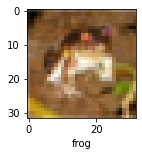

In [59]:
plot_sample(X_train, y_train, 0)

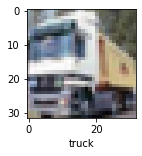

In [60]:
plot_sample(X_train, y_train, 1)

**Normalizing the training data**

In [61]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**convolutional neural network to train our images**

In [62]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [63]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3032 - accuracy: 0.1333


[2.303156614303589, 0.13330000638961792]

In [65]:
history = cnn.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
391/391 - 55s - loss: 1.6209 - accuracy: 0.4170 - val_loss: 1.3784 - val_accuracy: 0.5146 - 55s/epoch - 141ms/step
Epoch 2/10
391/391 - 55s - loss: 1.2826 - accuracy: 0.5475 - val_loss: 1.1896 - val_accuracy: 0.5833 - 55s/epoch - 139ms/step
Epoch 3/10
391/391 - 54s - loss: 1.1424 - accuracy: 0.6005 - val_loss: 1.0960 - val_accuracy: 0.6192 - 54s/epoch - 139ms/step
Epoch 4/10
391/391 - 54s - loss: 1.0544 - accuracy: 0.6333 - val_loss: 1.0268 - val_accuracy: 0.6413 - 54s/epoch - 139ms/step
Epoch 5/10
391/391 - 54s - loss: 1.0036 - accuracy: 0.6514 - val_loss: 1.0677 - val_accuracy: 0.6310 - 54s/epoch - 139ms/step
Epoch 6/10
391/391 - 54s - loss: 0.9498 - accuracy: 0.6718 - val_loss: 0.9742 - val_accuracy: 0.6673 - 54s/epoch - 138ms/step
Epoch 7/10
391/391 - 54s - loss: 0.9121 - accuracy: 0.6844 - val_loss: 0.9924 - val_accuracy: 0.6575 - 54s/epoch - 138ms/step
Epoch 8/10
391/391 - 54s - loss: 0.8752 - accuracy: 0.6981 - val_loss: 0.9371 - val_accuracy: 0.6756 - 54s/epoch - 138

In [66]:
history.history

{'loss': [1.6208710670471191,
  1.2825630903244019,
  1.1423817873001099,
  1.0544302463531494,
  1.0036251544952393,
  0.9497568011283875,
  0.9120847582817078,
  0.8751537203788757,
  0.8467174768447876,
  0.8216953277587891],
 'accuracy': [0.4169999957084656,
  0.5474799871444702,
  0.6005399823188782,
  0.6333199739456177,
  0.651419997215271,
  0.6718000173568726,
  0.6844000220298767,
  0.6980599761009216,
  0.7076600193977356,
  0.7166600227355957],
 'val_loss': [1.3783899545669556,
  1.1895804405212402,
  1.0960243940353394,
  1.0267577171325684,
  1.0676573514938354,
  0.9741790294647217,
  0.9924023151397705,
  0.9371166825294495,
  0.946523129940033,
  0.9223037362098694],
 'val_accuracy': [0.5145999789237976,
  0.583299994468689,
  0.6191999912261963,
  0.6413000226020813,
  0.6309999823570251,
  0.6672999858856201,
  0.6575000286102295,
  0.675599992275238,
  0.6797999739646912,
  0.6837999820709229]}

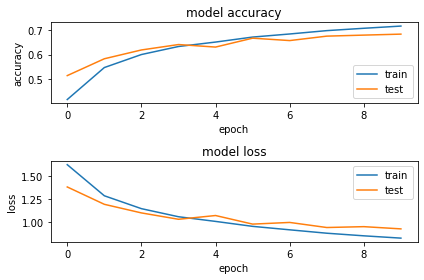

In [67]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()